A genetic algorithm (GA) is a type of computational optimization technique inspired by the principles of natural selection and genetics. It is used to solve complex problems by mimicking the process of evolution to improve a population of potential solutions iteratively.
 Genetic algorithms are adaptive heuristic search algorithms that belong to the larger part of evolutionary algorithms.

In a genetic algorithm, a population of candidate solutions (called individuals, creatures, organisms, or phenotypes) to an optimization problem is evolved toward better solutions. Each candidate solution has a set of properties (its chromosomes or genotype) which can be mutated and altered.

The basic elements of a genetic algorithm include chromosome representation, fitness selection, and biological-inspired operators such as crossover and mutation.
 Crossover is the process of recombination of genes, leading to the generation of new descendants as a result of the exchange of fragments of the parents’ chromosomes.

Genetic algorithms are commonly used to generate high-quality solutions to optimization and search problems via biologically inspired operators such as selection, crossover, and mutation. Some examples of GA applications include optimizing decision trees for better performance, solving Sudoku puzzles, hyperparameter optimization, and causal inference.

In [ ]:
import random
# Genetic Algorithm Parameters
POP_SIZE = 10 # Number of individuals in population
GENES = 5 # Number of bits in each chromosome (5-bit binary)
MUTATION_RATE = 0.1 # Probability of mutation
GENERATIONS = 20 # Number of generations
# Fitness function: f(x) = x^2
def fitness(x):

    return x ** 2
# Generate initial random population (binary representation)
def generate_population(size):
    return [random.randint(0, 31) for _ in range(size)]
# Tournament selection (selects the fittest)
def selection(population):
    return sorted(population, key=fitness, reverse=True)[:2] # Select top 2
# Crossover (Single-Point)
def crossover(parent1, parent2):
    point = random.randint(1, GENES - 1) # Select crossover point
    mask = (1 << point) - 1
    child1 = (parent1 & mask) | (parent2 & ~mask)
    child2 = (parent2 & mask) | (parent1 & ~mask)
    return child1, child2
# Mutation (Bit Flip)
def mutate(individual):
    if random.random() < MUTATION_RATE:
        bit_pos = 1 << random.randint(0, GENES - 1) # Select bit position
        individual ^= bit_pos # Flip bit
    return individual   
# Main Genetic Algorithm
def genetic_algorithm():
    population = generate_population(POP_SIZE)
    for generation in range(GENERATIONS):
        population = sorted(population, key=fitness, reverse=True)
        print(f"Generation {generation}: Best Solution = {population[0]} (Fitness: {fitness(population[0])}")
    new_population = []
    while len(new_population) < POP_SIZE:
        parent1, parent2 = selection(population)
        child1, child2 = crossover(parent1, parent2)
        new_population += [mutate(child1), mutate(child2)]
        population = new_population[:POP_SIZE] # Keep population size constant
# Best solution found
    best_solution = max(population, key=fitness)
    print(f"\nBest solution found: x = {best_solution}, f(x) = {fitness(best_solution)}")
# Run the genetic algorithm
genetic_algorithm()

c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\deap\gp.py:257: RuntimeWarning: Ephemeral rand function cannot be pickled because its generating function is a lambda function. Use functools.partial instead.
  warnings.warn("Ephemeral {name} function cannot be "


gen	nevals	avg    	min   
0  	300   	1.97169	0.2719
1  	175   	1.31928	0.195698
2  	182   	1.10661	0.0662684
3  	184   	0.982306	0.0662684
4  	174   	0.756926	0.0662684
5  	176   	0.731618	0.0312521
6  	178   	0.692455	0.049447 
7  	175   	0.628273	0.049447 
8  	181   	0.70785 	0.0253443
9  	162   	0.64866 	0.0380641
10 	174   	0.58924 	0.0380641
11 	162   	0.578871	0.00601431
12 	192   	0.812966	0.00601431
13 	193   	0.777823	0.0251428 
14 	178   	0.706539	0.0251428 
15 	172   	0.741092	0.0251428 
16 	192   	0.659858	0.0251428 
17 	173   	0.757762	0.0251428 
18 	189   	0.812155	8.98118e-05
19 	174   	0.427681	8.98118e-05
20 	165   	0.482352	8.98118e-05
21 	177   	0.411632	8.98118e-05
22 	172   	0.524962	8.98118e-05
23 	196   	0.497979	8.98118e-05
24 	178   	0.434933	8.98118e-05
25 	181   	0.376766	2.47617e-32
26 	176   	0.448296	2.47617e-32
27 	189   	0.434636	8.98118e-05
28 	180   	0.415815	8.98118e-05
29 	163   	0.354686	5.08897e-05
30 	185   	0.425999	5.08897e-05
31 	187   	0.44853

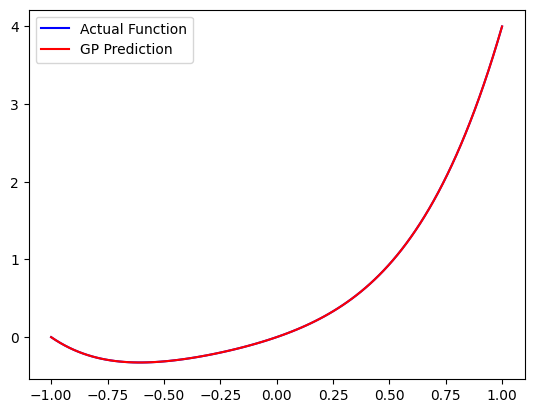

In [2]:
import operator
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, gp, algorithms
# Define the problem: y = x^4 + x^3 + x^2 + x
def target_function(x):
    return x**4 + x**3 + x**2 + x
# Generate input data
X = np.linspace(-1, 1, 100)
Y = [target_function(x) for x in X]
# Define GP primitives
pset = gp.PrimitiveSet("MAIN", 1)
pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
pset.addPrimitive(operator.neg, 1)
pset.addEphemeralConstant("rand", lambda: random.uniform(-1,
1))
pset.renameArguments(ARG0='x')

# Define fitness and individual
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", gp.PrimitiveTree,
fitness=creator.FitnessMin)
toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1,
max_=2)
toolbox.register("individual", tools.initIterate,
creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list,
toolbox.individual)
# Evaluation function
def evaluate(individual):
    func = toolbox.compile(expr=individual)
    predictions = [func(x) for x in X]
    return np.mean((np.array(predictions) - np.array(Y))**2),
toolbox.register("compile", gp.compile, pset=pset)
toolbox.register("evaluate", evaluate)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr,
pset=pset)
toolbox.decorate("mate",
gp.staticLimit(key=operator.attrgetter("height"),
max_value=17))
toolbox.decorate("mutate",
gp.staticLimit(key=operator.attrgetter("height"),
max_value=17))
# Run GP
population = toolbox.population(n=300)
hall_of_fame = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)
algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2,
ngen=40,
stats=stats, halloffame=hall_of_fame,
verbose=True)
# Output best solution
best_solution = hall_of_fame[0]
print("Best Solution:", best_solution)
# Plot the results
best_func = toolbox.compile(expr=best_solution)
predicted = [best_func(x) for x in X]
plt.plot(X, Y, label="Actual Function", color='blue')

plt.plot(X, predicted, label="GP Prediction", color='red')
plt.legend()
plt.show()

# Travelling Salesman Problem

In [ ]:

import random
import numpy as np

# Number of cities
NUM_CITIES = 10
POP_SIZE = 100  # Population size
MUTATION_RATE = 0.1
GENERATIONS = 500

# Generate random coordinates for cities
cities = np.random.rand(NUM_CITIES, 2) * 100

# Calculate the Euclidean distance between two cities
def distance(city1, city2):
    return np.linalg.norm(city1 - city2)

# Compute the total distance of a path
def total_distance(path):
    return sum(distance(cities[path[i]], cities[path[i + 1]]) for i in range(len(path) - 1)) + distance(cities[path[-1]], cities[path[0]])

# Generate initial random population (random city sequences)
def generate_population(size):
    return [random.sample(range(NUM_CITIES), NUM_CITIES) for _ in range(size)]

# Tournament selection (selects the fittest individuals)
def selection(population):
    selected = random.sample(population, k=5)  # Select 5 random individuals
    return min(selected, key=total_distance)  # Choose the best (shortest path)

# Order Crossover (OX)
def crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))
    child = [-1] * size
    child[start:end] = parent1[start:end]

    # Fill the remaining genes from parent2 in order
    p2_filtered = [gene for gene in parent2 if gene not in child]
    idx = 0
    for i in range(size):
        if child[i] == -1:
            child[i] = p2_filtered[idx]
            idx += 1
    return child

# Swap mutation
def mutate(individual):
    if random.random() < MUTATION_RATE:
        a, b = random.sample(range(len(individual)), 2)
        individual[a], individual[b] = individual[b], individual[a]
    return individual

# Genetic Algorithm
def genetic_algorithm():
    population = generate_population(POP_SIZE)
    for generation in range(GENERATIONS):
        population = sorted(population, key=total_distance)
        best_route = population[0]
        print(f"Generation {generation}: Best Distance = {total_distance(best_route):.2f}")
        
        new_population = [best_route]  # Keep the best route (elitism)
        while len(new_population) < POP_SIZE:
            parent1, parent2 = selection(population), selection(population)
            child = crossover(parent1, parent2)
            child = mutate(child)
            new_population.append(child)
        
        population = new_population  # Update population to the new generation

    # Best solution found
    best_solution = min(population, key=total_distance)
    print(f"\nBest route found: {best_solution}")
    print(f"Shortest distance: {total_distance(best_solution):.2f}")

# Run the GA for TSP
genetic_algorithm()

Generation 0: Best Distance = 317.18
Generation 1: Best Distance = 317.18
Generation 2: Best Distance = 308.99
Generation 3: Best Distance = 308.99
Generation 4: Best Distance = 305.63
Generation 5: Best Distance = 292.01
Generation 6: Best Distance = 292.01
Generation 7: Best Distance = 274.42
Generation 8: Best Distance = 274.42
Generation 9: Best Distance = 274.42
Generation 10: Best Distance = 274.42
Generation 11: Best Distance = 274.42
Generation 12: Best Distance = 274.42
Generation 13: Best Distance = 274.42
Generation 14: Best Distance = 274.42
Generation 15: Best Distance = 274.42
Generation 16: Best Distance = 274.42
Generation 17: Best Distance = 274.42
Generation 18: Best Distance = 274.42
Generation 19: Best Distance = 274.42
Generation 20: Best Distance = 274.42
Generation 21: Best Distance = 274.42
Generation 22: Best Distance = 274.42
Generation 23: Best Distance = 274.42
Generation 24: Best Distance = 274.42
Generation 25: Best Distance = 274.42
Generation 26: Best Di